In [79]:
using LaTeXStrings, Plots
using Random

include("/home/jakob/Dokumente/Git_Project/1D_Models/1D_library.jl")

In [80]:
#path = "/home/jakob/Dokumente/Git_Project/1D_Models/Different_Models/1st_Order/"

### which model do you want to simulate? ###

##### 1st Order #####

#model = "Simple_OV_stepping_noise"
#model = "Simple_OV_stepping_v_min"
#model = "Simple_OV_stepping"
#model = "Simple_OV"
#model = "OV_Noise_Ant"
#model = "ant_ov"


#include(string(path, model, ".jl"))

###### 2nd Order #####

path = "/home/jakob/Dokumente/Git_Project/1D_Models/Different_Models/2nd_Order/"

#model = "ant_ov"
model = "OV_model"
#model = "Noise_OV"
#model = "Noise_OV_HW"

#model = "Noise_OV_neg_Head"

include(string(path, model, ".jl"))

In [93]:
#### parameters of the agents ####
p = [1.2, 1.0, 0.3, 0.65 ,0.0, 0.0, 0.0, 0.0] #v_max, T, l, τ_R, τ_A, dt_step, γ, σ
dt, dt_save, t_sim, t_relax = 0.01, 0.2, 2850.0, 2800.0 

### of the system ###
N = 50
L = 25
menge = create_crowd(N)
Init_Hom_Parameters!(menge, p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8]/sqrt(dt))
Init_Hom_Velocities!(menge, 1.0)

Init_Hom_Positions!(menge, L)
Add_Max_Pertubation!(menge, 1, L);

In [94]:
#positions, velocities = Simulate!(menge, dt, dt_save, t_sim, t_relax, L);
positions, velocities = Simulate_2nd_Order!(menge, dt, dt_save, t_sim, t_relax, L);

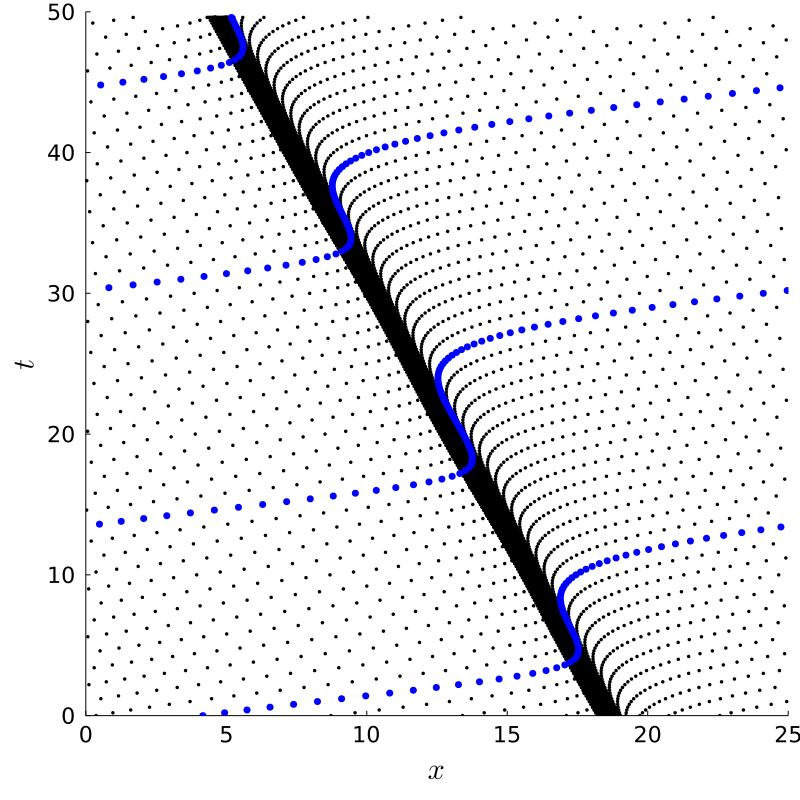

In [95]:
Plots.scalefontsizes()
Plots.scalefontsizes(2)

t = collect(0:dt_save:(t_sim-t_relax-2*dt_save))

plot(layout=(1,1), legend=:topleft, legendfontsize = 15,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20, grid = false)

for i in 1:N-1
    scatter!(positions[:, i] , t ,label=:false,color="black", markersize=2)
end

scatter!(positions[:, N] , t, label=:false,color=:blue, markersize=4, msw=0)

plot!(ylabel=L"$t$") 
plot!(xlabel=L"$x$")    

plot!(xlims = (0, L))
plot!(ylims = (0, 50))

#y_values = collect(0:20:100)
#x_values = collect(0:5:25)

#plot!(xticks=(x_values, [L"%$x" for x in x_values]), yticks=(y_values, [L"%$x" for x in y_values]))

plot!(size=(800,800))
#savefig("./trajectories.png")